# Project:
**Data Description & Context:**
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by
decreased dopamine levels in the brain. It manifests itself through a deterioration
of movement, including the presence of tremors and stiffness. There is commonly
a marked effect on speech, including dysarthria (difficulty articulating sounds),
hypophonia (lowered volume), and monotone (reduced pitch range). Additionally,
cognitive impairments and changes in mood can occur, and risk of dementia is
increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a
neurological history of the patient and observing motor skills in various situations.
Since there is no definitive laboratory test to diagnose PD, diagnosis is often
difficult, particularly in the early stages when motor effects are not yet severe.
Monitoring progression of the disease over time requires repeated clinic visits by
the patient. An effective screening process, particularly one that doesn’t require a
clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal
features, voice recordings are a useful and non-invasive tool for diagnosis. If
machine learning algorithms could be applied to a voice recording dataset to
accurately diagnosis PD, this would be an effective screening step prior to an
appointment with a clinician

**Objective:** Goal is to classify the patients into the respective labels using the attributes from their voice recordings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parkinson_df = pd.read_csv('Data - Parkinsons', delimiter=',', engine='python')

In [3]:
#Read parkinson data from csv file and display top 5 records 
parkinson_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#Create a copy of original dataframe for data manipulation
parkinson_df_copy = parkinson_df

In [5]:
#As status is the target variable, rearranging it dataframe to drop the 'status' column from original place
#and append at the end
status = parkinson_df['status']
parkinson_df_copy.drop(['status'], inplace = True, axis = 1)
parkinson_df['status'] = status

In [6]:
parkinson_df.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1


## Question:  It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard

#### Data Exploration

In [7]:
#Get number of rows and columns of the data records/structure of the file
parkinson_df.shape

(195, 24)

There are 195 rows and 24 columns in total - including the target variable

In [8]:
#Get datatypes of each column - convert object data type(if any) to categorical data
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

The dataset has no null values and only "name" is of Object type - We'll not convert "name" to categorical as it is an identifier of each record

In [9]:
# Rechecking if any missing value
parkinson_df.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
status              False
dtype: bool

There is no null value present in the parkinson dataset.

In [10]:
#Checking the unique data
parkinson_df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
status                2
dtype: int64

In [11]:
#Five point summary of  attributes and label
#Transposing index and columns
parkinson_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [12]:
# There are 147 people affected with Parkinson disease
parkinson_df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

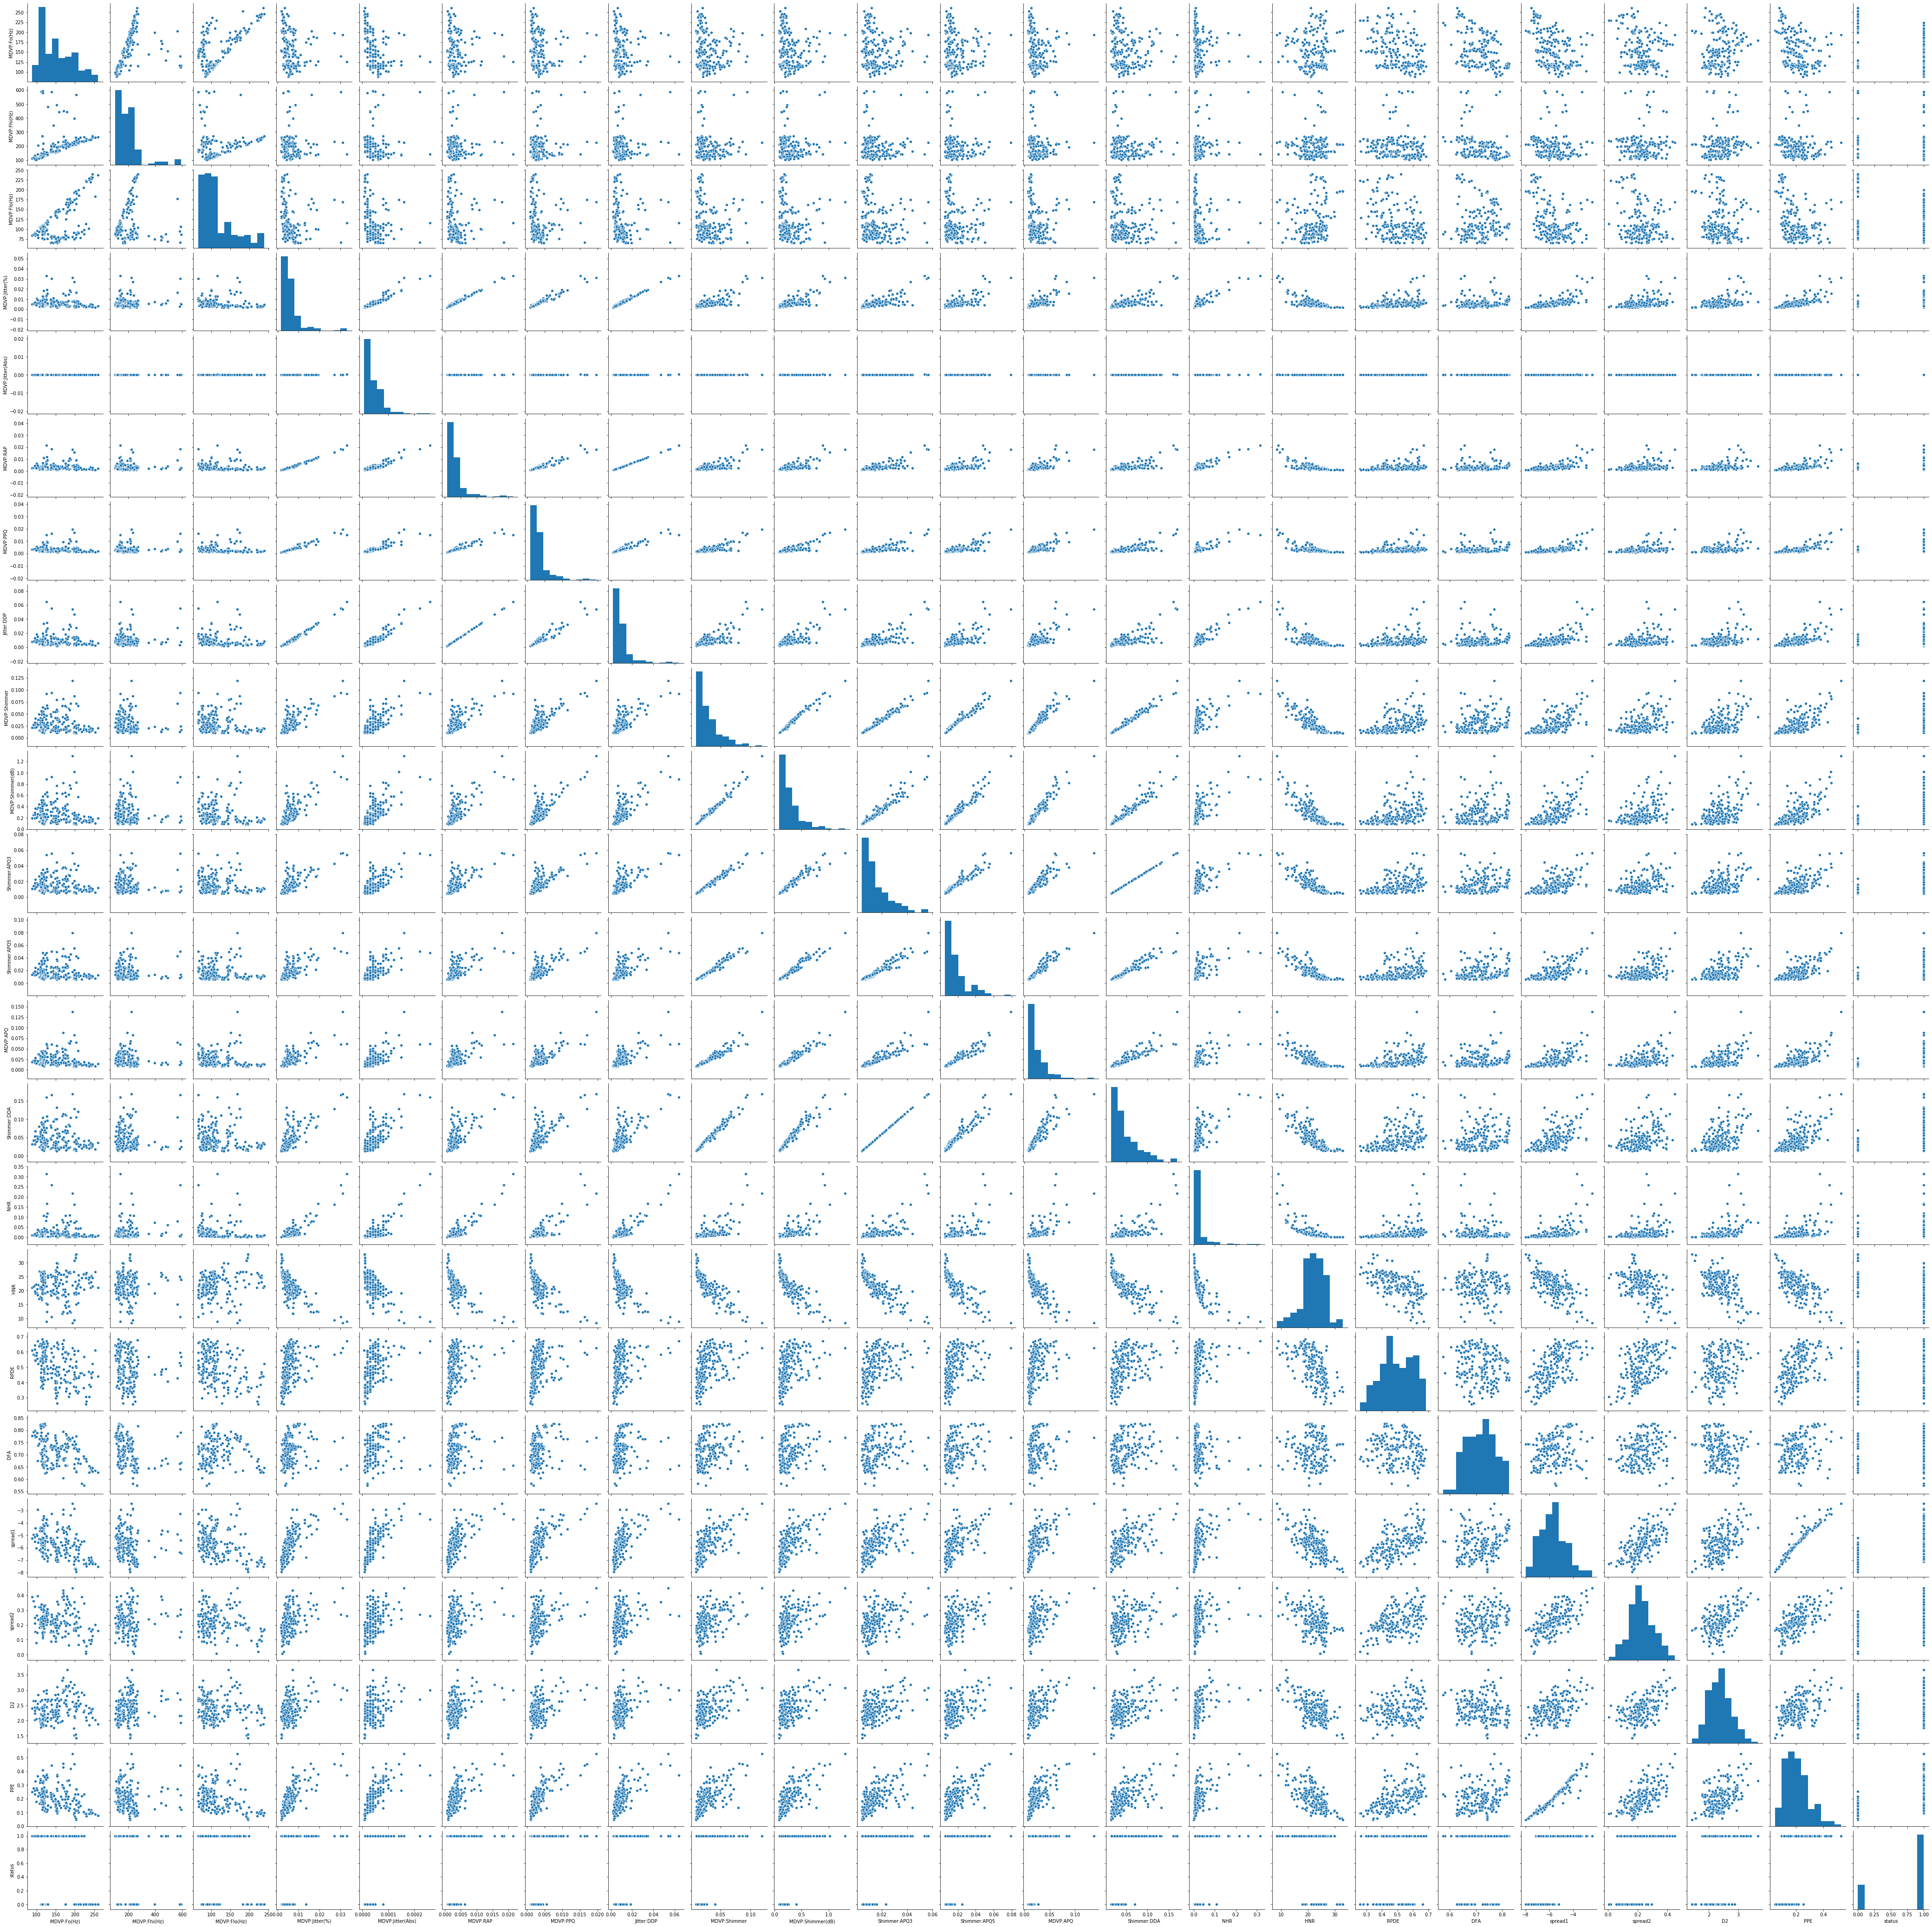

In [13]:
## Pair plot that includes all the columns of the data frame
#name column in the pair plot is not relevent as it is only for record index
sns.pairplot(parkinson_df.iloc[:,1:25])

#### Correlation using Heatmap

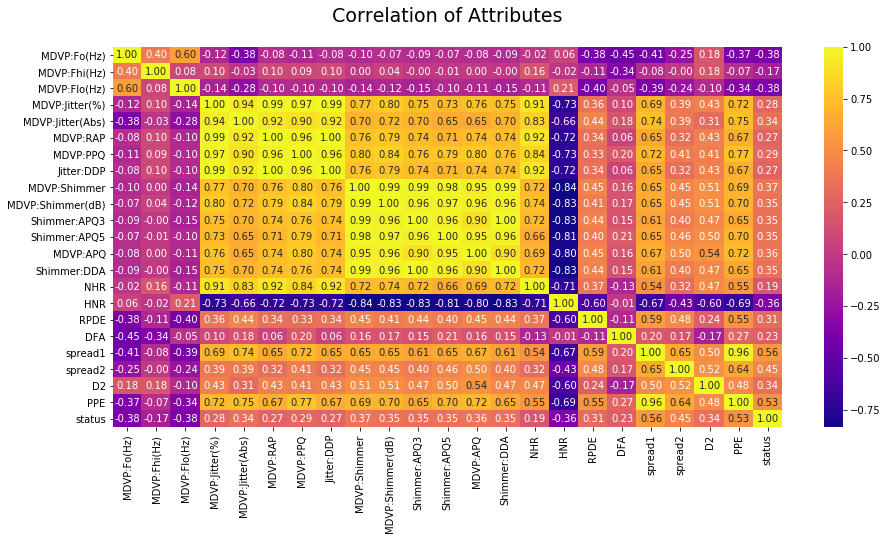

In [14]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(parkinson_df.corr(), cmap='plasma',annot=True, fmt='.2f')

In [15]:
# correlation coefficient values in each attributes.
correlation_values=parkinson_df.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

**Observation** : As the pair plot is too clumsy, the heatmap gives a better picture of the relationship between variables 
1. MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
2. MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables
3. The target variable status has a weak positive correlation with spread1 and PPE
4. We'll drop name column as it is only a unique identifier 

## Question : Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations

**Univariate Analysis**

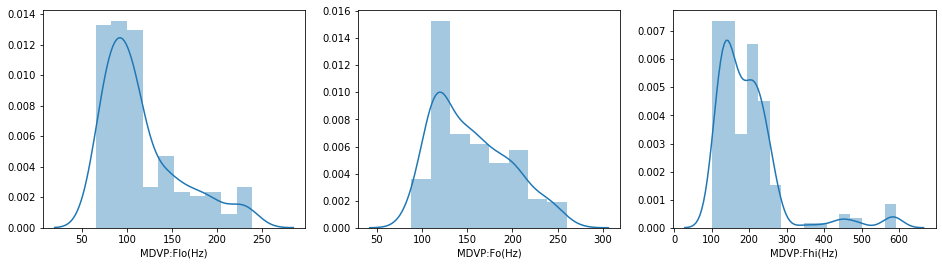

In [16]:
fig, ax = plt.subplots(1,3,figsize=(16,4)) 
sns.distplot(parkinson_df['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(parkinson_df['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(parkinson_df['MDVP:Fhi(Hz)'],ax=ax[2])

The measures of vocal fundamental frequency are shown above. There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. The high vocal frequency does not have any skewness, but some range of values are at the right most tail

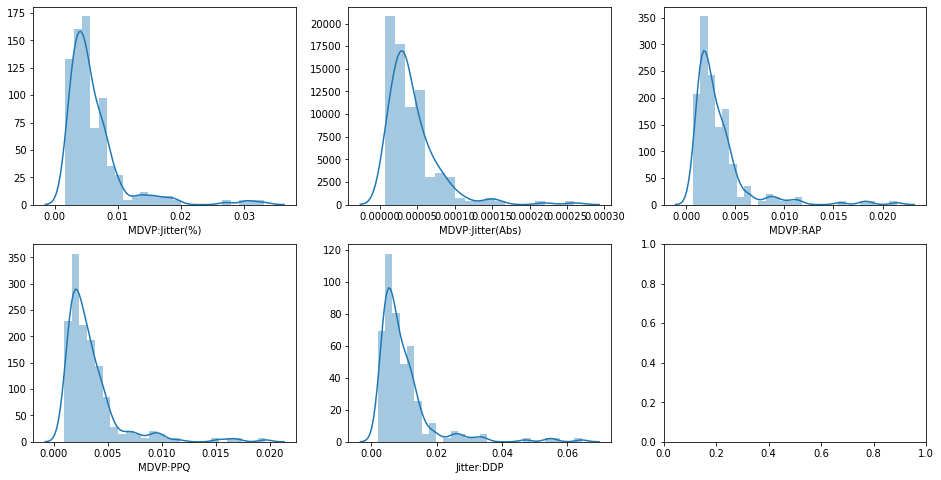

In [17]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(parkinson_df['MDVP:Jitter(%)'],ax=ax[0,0]) 
sns.distplot(parkinson_df['MDVP:Jitter(Abs)'],ax=ax[0,1]) 
sns.distplot(parkinson_df['MDVP:RAP'],ax=ax[0,2]) 
sns.distplot(parkinson_df['MDVP:PPQ'],ax=ax[1,0]) 
sns.distplot(parkinson_df['Jitter:DDP'],ax=ax[1,1])

For all of the above graphs, we can observe that the measure of variation in amplitude is positively skewed

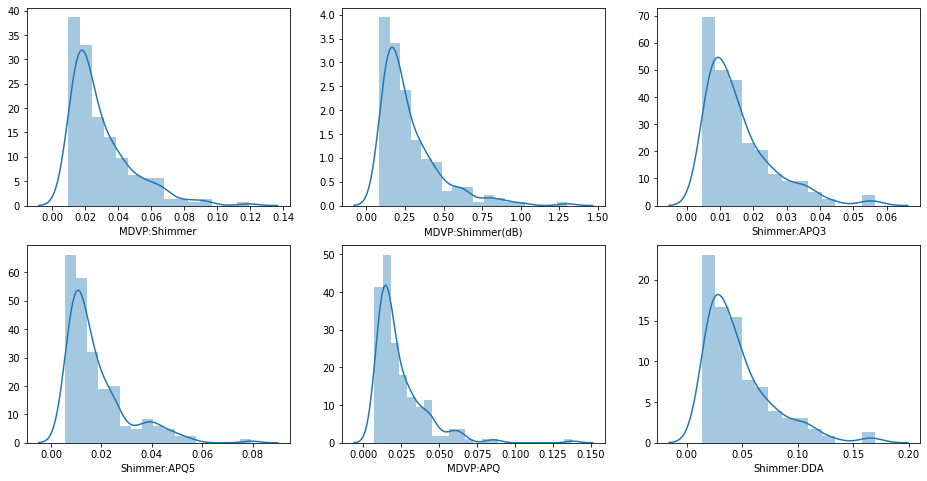

In [18]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(parkinson_df['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(parkinson_df['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(parkinson_df['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(parkinson_df['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(parkinson_df['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(parkinson_df['Shimmer:DDA'],ax=ax[1,2])

For all of the above graphs, we can observe that the measure of variation in amplitude is positively skewed

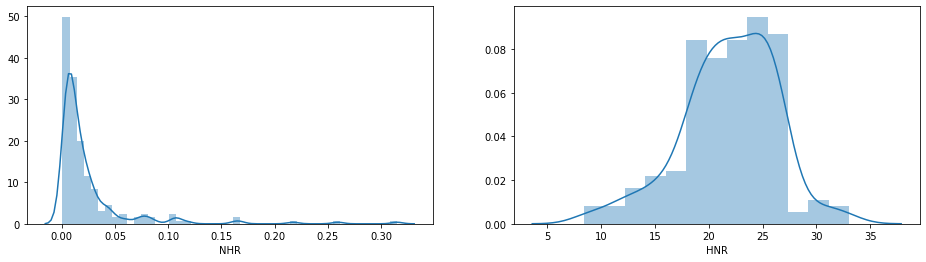

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16,4)) 
sns.distplot(parkinson_df['NHR'],ax=ax[0]) 
sns.distplot(parkinson_df['HNR'],ax=ax[1])

The measure of tonal component of frequency is shown above. The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. The maximum number of observations is between 0 and 0.04. The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness

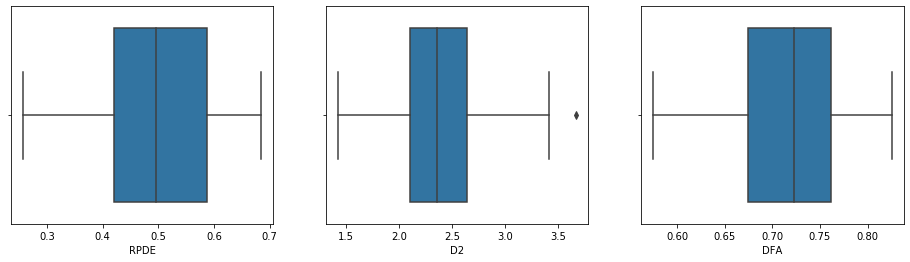

In [20]:
fig, ax = plt.subplots(1,3,figsize=(16,4)) 
sns.boxplot(parkinson_df['RPDE'],ax=ax[0]) 
sns.boxplot(parkinson_df['D2'],ax=ax[1])
sns.boxplot(parkinson_df['DFA'],ax=ax[2])

For all of the above plots, there are very few outliers. Mojority data lies in the 50% quartile

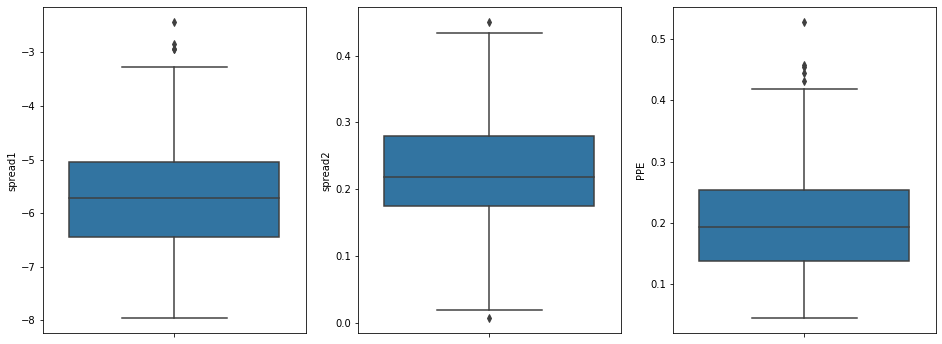

In [21]:
fig, ax = plt.subplots(1,3,figsize=(16,6)) 
sns.boxplot(parkinson_df['spread1'], ax=ax[0],orient='v') 
sns.boxplot(parkinson_df['spread2'], ax=ax[1],orient='v')
sns.boxplot(parkinson_df['PPE'], ax=ax[2],orient='v')

The above figure shows the box plot of the frequency variation. All the three variations have outliers

**BiVariate Analysis**

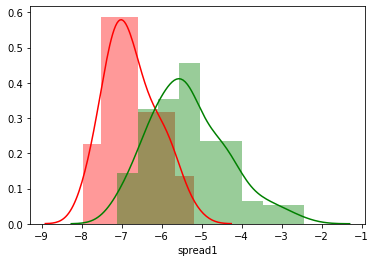

In [22]:
sns.distplot(parkinson_df[parkinson_df.status == 0]['spread1'], color = 'r')
sns.distplot(parkinson_df[parkinson_df.status == 1]['spread1'], color = 'g')

Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

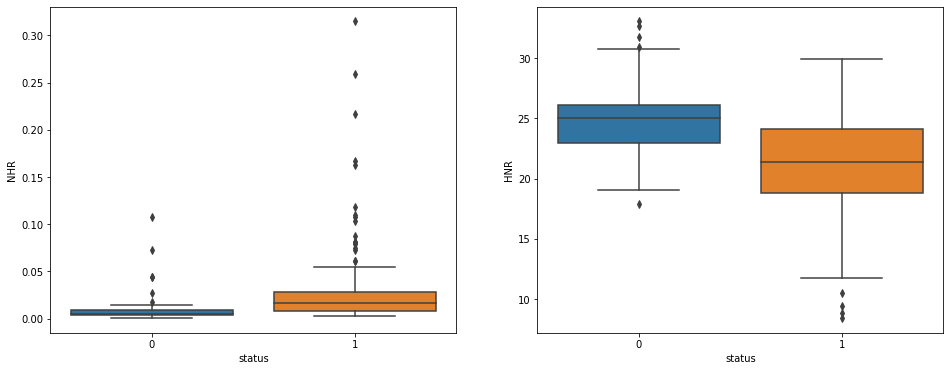

In [23]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.boxplot(x='status',y='NHR',data=parkinson_df,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=parkinson_df,ax=ax[1])

People who have PD(status equal to one) have higher levels of Noise to Harmonic ratio. Also, looking into the HNR ratio people who have PD have lower levels in the same.

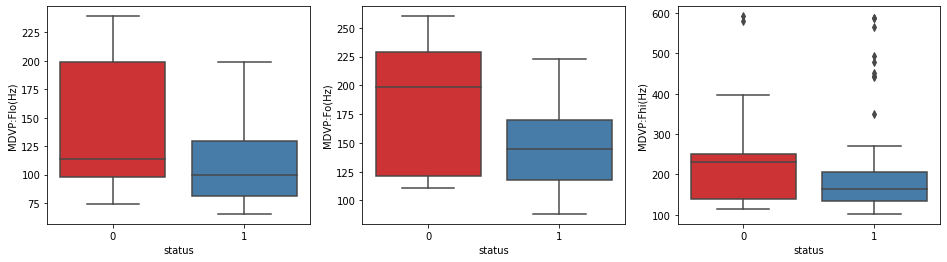

In [24]:
fig, ax = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=parkinson_df,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=parkinson_df,palette="Set1",ax=ax[1])
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=parkinson_df,palette="Set1",ax=ax[2])

Observation: 
* When we look the relationship between status and MDVP:Flo(Hz) we can see the median value is around 115 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 99 Hz
* When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz
* When we look the relationship between status and MDVP:Fhi(Hz) we can see the median value is around 230 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 160 Hz

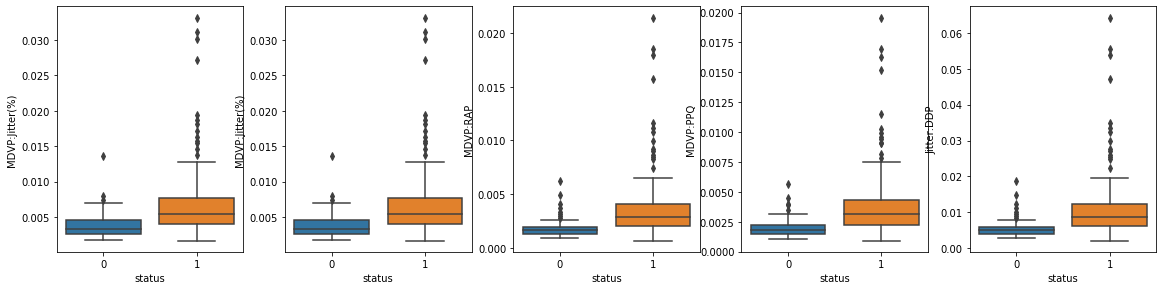

In [25]:
cols = ["MDVP:Jitter(%)","MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,4))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=parkinson_df, ax = axs[i])

People who are suffering for PD tend to have higher jitter %. It seems if the values goes above 0.15 we can confirm the patient is having PD. The variation of fundamental frequency is in a low range for people who is normal.

## Question: Split the dataset into training and test set in the ratio of 70:30

In [26]:
#Name is a unique identifier, it is not required for training the model
array = parkinson_df
cols=['name','status']
X = array.drop(cols,axis=1) #Feature columns
y = array['status'] #Predicted Output column

In [27]:
#Spliting the data into 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
#Checking % of data split 
print("{0:0.2f}% data is in training set".format((len(X_train)/len(parkinson_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(parkinson_df.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [29]:
#Checking % of data split in the output variable
print("Original status 1 Values    : {0} ({1:0.2f}%)".format(len(parkinson_df.loc[parkinson_df['status'] == 1]), (len(parkinson_df.loc[parkinson_df['status'] == 1])/len(parkinson_df.index)) * 100))
print("Original status 0 Values   : {0} ({1:0.2f}%)".format(len(parkinson_df.loc[parkinson_df['status'] == 0]), (len(parkinson_df.loc[parkinson_df['status'] == 0])/len(parkinson_df.index)) * 100))
print("")
print("Training status 1 Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training status 0 Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test status 1 Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test status 0 Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original status 1 Values    : 147 (75.38%)
Original status 0 Values   : 48 (24.62%)

Training status 1 Values    : 107 (78.68%)
Training status 0 Values   : 29 (21.32%)

Test status 1 Values        : 40 (67.80%)
Test status 0 Values       : 19 (32.20%)



## Question: Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc 

In [30]:
parkinson_df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

We have already seen below points in the above steps :
* There are no missing values in the dataset - no additional processing required
* We have already scaled the data, now we will feed the scaled data to our model
* X_train, X_test, y_train, y_test are variables on which we will further build our models
* There are 147 patients with parkinson disease in the dataset. After split, there are 107 patients with parkinson in the training dataset and 40 patients with parkinson in the test dataset

## Question: Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

**A> Logistic Regression**

In [32]:
from sklearn import metrics
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression

# Fit the model on train
logreg_model = LogisticRegression(solver="liblinear")
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#predict on test
y_predict_logreg = logreg_model.predict(X_test)

In [34]:
acc_LG_train = logreg_model.score(X_train, y_train)
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(acc_LG_train))

Accuracy of logistic regression classifier on train set: 0.8750


In [35]:
acc_LG = logreg_model.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(acc_LG))

Accuracy of logistic regression classifier on test set: 0.7966


In [36]:
print("Confusion Matrix of Logistic Regression:\n",confusion_matrix(y_predict_logreg,y_test))

Confusion Matrix of Logistic Regression:
 [[ 7  0]
 [12 40]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 40

True Negatives (TN): we correctly predicted that they did do not have parkison = 7

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 12 Falsely predict negative Type II error

**B> KNN Model**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')

# Call Nearest Neighbour algorithm
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [38]:
y_predict_kNN = classifier.predict(X_test)

In [39]:
acc_KNN_train = classifier.score(X_train, y_train)
print('Accuracy of k Nearest Neighbour model on train set: {:.4f}'.format(acc_KNN_train))

Accuracy of k Nearest Neighbour model on train set: 1.0000


In [40]:
acc_KNN = metrics.accuracy_score(y_test, y_predict_kNN)
print('Accuracy of k Nearest Neighbour model on test set: {:.4f}'.format(acc_KNN))

Accuracy of k Nearest Neighbour model on test set: 0.9322


In [41]:
print("Confusion Matrix of k Nearest Neighbour:\n",confusion_matrix(y_predict_kNN,y_test))

Confusion Matrix of k Nearest Neighbour:
 [[15  0]
 [ 4 40]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 40

True Negatives (TN): we correctly predicted that they did do not have parkison = 15

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 4 Falsely predict negative Type II error

**C> Naive Bayes Algorithm Model**

In [42]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
bayes_model = GaussianNB()

bayes_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
#Performance of our model with training data
bayes_predict_train = bayes_model.predict(X_train)

from sklearn import metrics
acc_NB_train = metrics.accuracy_score(y_train, bayes_predict_train)
print("Accuracy of Naive Bayes Model on training set: {0:.4f}".format(acc_NB_train))
print()

Accuracy of Naive Bayes Model on training set: 0.7206



In [44]:
#Performance of our model with testing data
bayes_predict_test = bayes_model.predict(X_test)

acc_NB = metrics.accuracy_score(y_test, bayes_predict_test)
print("Accuracy of Naive Bayes Model on test set: {0:.4f}".format(acc_NB))
print()

Accuracy of Naive Bayes Model on test set: 0.7288



In [45]:
print("Confusion matrix of Naive Bayes Algorithm:")
confusion_matrix_naive = confusion_matrix(y_test, bayes_predict_test)
print(confusion_matrix_naive)

Confusion matrix of Naive Bayes Algorithm:
[[11  8]
 [ 8 32]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 32

True Negatives (TN): we correctly predicted that they did do not have parkison = 11

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 8 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 3 Falsely predict negative Type II error

**D> SVM Algorithm Model**

In [46]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear',random_state=22)
svc_model.fit(X_train, y_train)

y_predict_svm = svc_model.predict(X_test)

In [47]:
# check the accuracy on the training set
acc_SVM_linear_train = svc_model.score(X_train, y_train)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_linear_train))
acc_SVM_linear = svc_model.score(X_test, y_test)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_linear))

Accuracy of SVM on train set: 0.9044
Accuracy of SVM on test set: 0.7966


In [48]:
print("Confusion Matrix of SVM with kernel='linear':\n",confusion_matrix(y_predict_svm,y_test))

Confusion Matrix of SVM with kernel='linear':
 [[ 7  0]
 [12 40]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 40

True Negatives (TN): we correctly predicted that they did do not have parkison = 7

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 12 Falsely predict negative Type II error

In [49]:
# Building a Support Vector Machine on train data with kernel = 'rbf'
svc_model = SVC(kernel='rbf',random_state=22)
svc_model.fit(X_train, y_train)

y_predict_svm_rbf = svc_model.predict(X_test)

In [50]:
# check the accuracy on the training set
acc_SVM_rbf_train = svc_model.score(X_train, y_train)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_rbf_train))
acc_SVM_rbf = svc_model.score(X_test, y_test)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_rbf))

Accuracy of SVM on train set: 0.9044
Accuracy of SVM on test set: 0.7966


In [51]:
print("Confusion Matrix of SVM with kernel='rbf':\n",confusion_matrix(y_predict_svm_rbf,y_test))

Confusion Matrix of SVM with kernel='rbf':
 [[ 7  0]
 [12 40]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 40

True Negatives (TN): we correctly predicted that they did do not have parkison = 7

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 12 Falsely predict negative Type II error

In [52]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly',random_state=22)
svc_model.fit(X_train, y_train)

y_predict_svm_poly = svc_model.predict(X_test)

In [53]:
# check the accuracy on the training set
acc_SVM_poly_train = svc_model.score(X_train, y_train)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_poly_train))
acc_SVM_poly = svc_model.score(X_test, y_test)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_poly))

Accuracy of SVM on train set: 0.9191
Accuracy of SVM on test set: 0.8305


In [54]:
print("Confusion Matrix of SVM with kernel='poly':\n",confusion_matrix(y_predict_svm_poly,y_test))

Confusion Matrix of SVM with kernel='poly':
 [[ 9  0]
 [10 40]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 40

True Negatives (TN): we correctly predicted that they did do not have parkison = 9

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 10 Falsely predict negative Type II error

In [55]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model = SVC(kernel='sigmoid',random_state=22)
svc_model.fit(X_train, y_train)

y_predict_svm_sigmoid = svc_model.predict(X_test)

In [56]:
# check the accuracy on the training set
acc_SVM_sigmoid_train = svc_model.score(X_train, y_train)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_sigmoid_train))
acc_SVM_sigmoid = svc_model.score(X_test, y_test)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_sigmoid))

Accuracy of SVM on train set: 0.7868
Accuracy of SVM on test set: 0.7288


In [57]:
print("Confusion Matrix of SVM with kernel='sigmoid':\n",confusion_matrix(y_predict_svm_sigmoid,y_test))

Confusion Matrix of SVM with kernel='sigmoid':
 [[ 3  0]
 [16 40]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 40

True Negatives (TN): we correctly predicted that they did do not have parkison = 3

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 16 Falsely predict negative Type II error

**Observation:** 
* Accuracy of logistic regression classifier on test set: 79.66%
* Accuracy of k Nearest Neighbour model on test set: 93.22%
* Accuracy of Naive Bayes Model on test set: 72.88%
* Accuracy of SVM on test set is as below:
 - kernel='linear' : 79.66%
 - kernel='rbf' : 79.66%
 - kernel='poly' : 79.66%
 - kernel='sigmoid' : 72.88%

## Question: Train a meta-classifier and note the accuracy on test data

In [58]:
from mlxtend.classifier import StackingClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = LogisticRegression()
clf3 = GaussianNB()
clf4 = RandomForestClassifier(random_state=22)

In [60]:
rf = RandomForestClassifier(random_state=22)

In [61]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier = rf)

In [62]:
from sklearn import model_selection
print('3-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3, clf4, sclf], ['KNN', 'LR', 'Naive Bayes', 'RF',
                                                 'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.87 (+/- 0.12) [KNN]
Accuracy: 0.78 (+/- 0.15) [LR]
Accuracy: 0.68 (+/- 0.17) [Naive Bayes]
Accuracy: 0.80 (+/- 0.12) [RF]
Accuracy: 0.80 (+/- 0.12) [StackingClassifier]


**Using probabilities in stacking**

In [63]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=22)
clf3 = GaussianNB()
clf4 = LogisticRegression()

In [64]:
lr = LogisticRegression()

In [65]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

In [66]:
print('3-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3, clf4, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_test, y_test, 
                                              cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.87 (+/- 0.12) [KNN]
Accuracy: 0.80 (+/- 0.12) [Random Forest]
Accuracy: 0.68 (+/- 0.17) [Naive Bayes]
Accuracy: 0.78 (+/- 0.15) [Logistic Regression]
Accuracy: 0.85 (+/- 0.12) [StackingClassifier]


## Question: Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

**Random forest Algorithm**

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 40,random_state=22)
rfcl = rfcl.fit(X_train, y_train)

In [68]:
acc_RF_train = rfcl.score(X_train,y_train)
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [69]:
print("Accuracy of Random forest Algorithm on train set: {0:.4f}".format(acc_RF_train))
print("Accuracy of Random forest Algorithm on test set: {0:.4f}".format(acc_RF))
print()

Accuracy of Random forest Algorithm on train set: 1.0000
Accuracy of Random forest Algorithm on test set: 0.8305



In [70]:
print("Confusion Matrix of Random forest Algorithm:\n",confusion_matrix(pred_RF,y_test))

Confusion Matrix of Random forest Algorithm:
 [[ 9  0]
 [10 40]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 40

True Negatives (TN): we correctly predicted that they did do not have parkison = 9

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 10 Falsely predict negative Type II error

**Adaboost Ensemble Algorithm**

In [71]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators= 50, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [72]:
acc_AB_train = abcl.score(X_train,y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [73]:
print("Accuracy of Adaboost Ensemble Algorithm on train set: {0:.4f}".format(acc_AB_train))
print("Accuracy of Adaboost Ensemble Algorithm on test set: {0:.4f}".format(acc_AB))
print()

Accuracy of Adaboost Ensemble Algorithm on train set: 0.9559
Accuracy of Adaboost Ensemble Algorithm on test set: 0.7966



In [74]:
print("Confusion Matrix of Adaboost Ensemble Algorithm:\n",confusion_matrix(pred_AB,y_test))

Confusion Matrix of Adaboost Ensemble Algorithm:
 [[ 7  0]
 [12 40]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 40

True Negatives (TN): we correctly predicted that they did do not have parkison = 7

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 12 Falsely predict negative Type II error

**Bagging Classifier Algorithm**

In [75]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [76]:
acc_BG_train = bgcl.score(X_train,y_train)
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [77]:
print("Accuracy of Bagging Classifier Algorithm on train set: {0:.4f}".format(acc_BG_train))
print("Accuracy of Bagging Classifier Algorithm on test set: {0:.4f}".format(acc_BG))
print()

Accuracy of Bagging Classifier Algorithm on train set: 0.9853
Accuracy of Bagging Classifier Algorithm on test set: 0.8136



In [78]:
print("Confusion Matrix of Bagging Classifier Algorithm:\n",confusion_matrix(pred_BG,y_test))

Confusion Matrix of Bagging Classifier Algorithm:
 [[ 9  1]
 [10 39]]


The confusion matrix

True Positives (TP): we correctly predicted that they have parkinson = 39

True Negatives (TN): we correctly predicted that they did do not have parkison = 9

False Positives (FP): we incorrectly predicted that they have parkinson (a "Type I error") = 1 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do not have parkinson (a "Type II error") 10 Falsely predict negative Type II error

## Question: Compare all the models (minimum 5) and pick the best one among them

In [80]:
resultsDf = pd.DataFrame({'Method':['KNN'], 'accuracy-train': acc_KNN_train, 'accuracy-test': acc_KNN})
resultsDf = resultsDf[['Method', 'accuracy-train', 'accuracy-test']]
resultsDf
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy-train': acc_RF_train, 'accuracy-test': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy-train': acc_BG_train, 'accuracy-test': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 'accuracy-train': acc_AB_train, 'accuracy-test': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'accuracy-train': acc_SVM_linear_train, 'accuracy-test': [acc_SVM_linear]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy-train': acc_LG_train, 'accuracy-test': [acc_LG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf
tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'], 'accuracy-train': acc_NB_train, 'accuracy-test': [acc_NB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy-train,accuracy-test
0,KNN,1.000000,0.932203
0,Random Forest,1.000000,0.830508
0,Bagging,0.985294,0.813559
0,AdaBoosting,0.955882,0.796610
0,SVM,0.904412,0.796610
0,Logistic Regression,0.875000,0.796610
0,Naive Bayes,0.720588,0.728814


**Observation:** 
From the above dataframe below points can be noted: 
* In kNN, the accuracy is highest(93.22%) and confusion matrix has more number of TP's and TN's than other models, the kNN model has data overfit as it performs extremely well with training data, but not that great with testing data.
* In Random Forest, the accuracy is 83.05% and has data overfit as it performs extremely well with training data, but not that great with testing data.
* StackingClassifier model using probabilities has a accuracy score of 85% with a standard deviation of +/- 12%
* In Bagging, the accuracy is 81.355% and has data overfit as well. It performs well with training data, but not that great with testing data, Training and testing data is not comparable.
* AddaBoosting, SVM, Logistic Regression and Naive Bayes algorithms gives comparatively poor accuracy resulting into lesser TP's and TN's in the confusion matrix 

As, **KNN** model's prediction & accuracy on testing data is much on the higher side compared to other models - KNN model is best best suited though there is data overfit
We can argue on this point that chosing a model with data overfit is not a good idea, but the argument will have a valid win win situation when there are other comparable models.

Also, **StackingClassier** model using probabilities can be used for the above dataset.